Задание 6.4

Вам предлагается файл data.csv, содержащий шесть колонок и  строк. В каждой колонке данные сгенерированы по некоторому закону распределения. Выберите верный закон распределения для данных из первой колонки column_1.

In [1]:
import pandas as pd
data = pd.read_csv("C:/Users/U_M1P8G/Desktop/IDE/Мат. статистика/Модуль_2_тест.csv")

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   column_1  10000 non-null  float64
 1   column_2  10000 non-null  int64  
 2   column_3  10000 non-null  int64  
 3   column_4  10000 non-null  float64
 4   column_5  10000 non-null  float64
 5   column_6  10000 non-null  int64  
dtypes: float64(3), int64(3)
memory usage: 468.9 KB


In [40]:
data['column_5'].describe()

count    10000.000000
mean        20.034962
std          2.888833
min         15.000092
25%         17.572796
50%         20.042798
75%         22.554111
max         24.999425
Name: column_5, dtype: float64

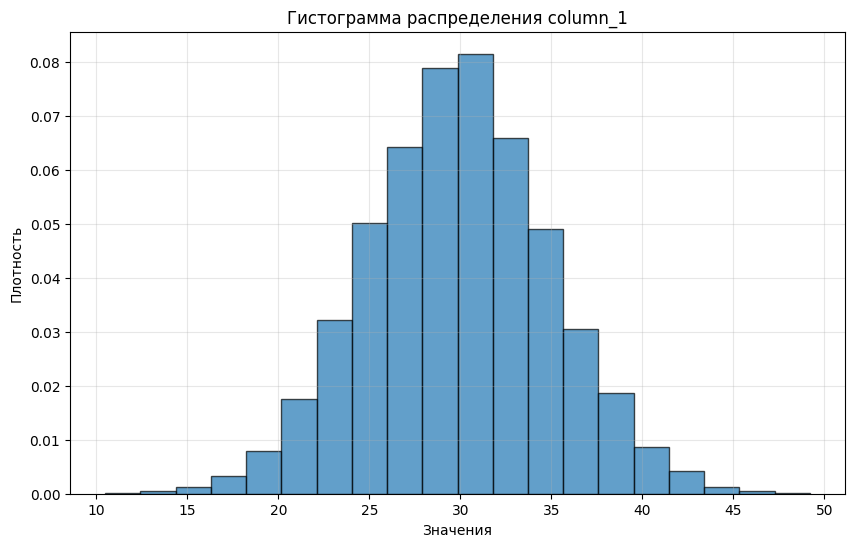

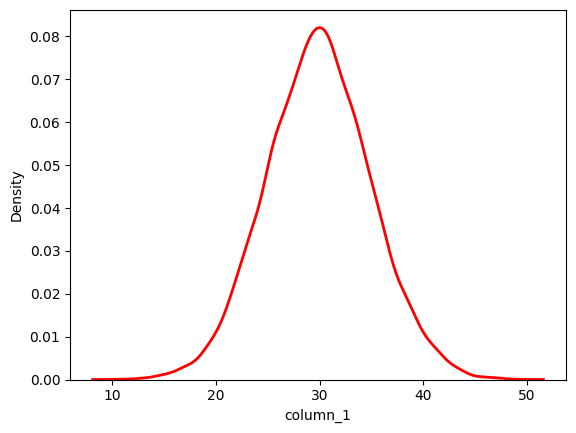

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
plt.hist(data['column_1'], bins=20, density=True, alpha=0.7, edgecolor='black')
plt.title('Гистограмма распределения column_1')
plt.xlabel('Значения')
plt.ylabel('Плотность')
plt.grid(True, alpha=0.3)
plt.show()
sns.kdeplot(data['column_1'], color='red', linewidth=2)
plt.show()

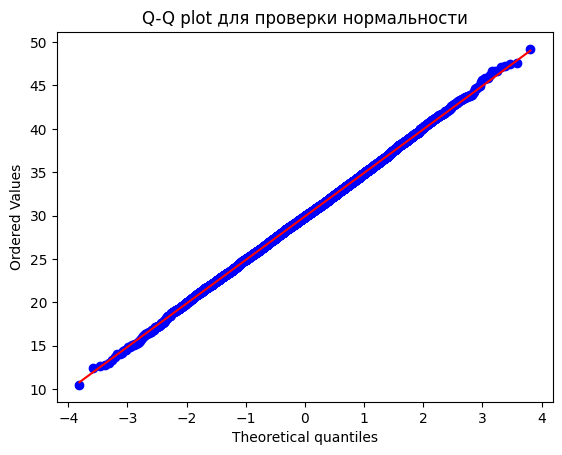

In [10]:
import scipy.stats as stats

stats.probplot(data['column_1'], dist="norm", plot=plt)
plt.title('Q-Q plot для проверки нормальности')
plt.show()

Задание 6.5

Выберите верный закон распределения для данных из второй колонки column_2.

In [15]:
data['column_2'].describe()

count    10000.000000
mean       219.976900
std          9.774319
min        181.000000
25%        213.000000
50%        220.000000
75%        226.000000
max        258.000000
Name: column_2, dtype: float64

АНАЛИЗ ДИСКРЕТНЫХ ДАННЫХ column_2
Размер выборки: 10000
Минимум: 181
Максимум: 258
Уникальных значений: 70
Среднее: 219.977
Дисперсия: 95.537
Стандартное отклонение: 9.774
Медиана: 220.0
Мода: 220
Асимметрия (skewness): 0.032
Эксцесс (kurtosis): 0.017

КЛЮЧЕВЫЕ СТАТИСТИКИ ДЛЯ ОПРЕДЕЛЕНИЯ ТИПА РАСПРЕДЕЛЕНИЯ
Среднее ≈ 220.0
Дисперсия ≈ 95.5
Отношение дисперсии к среднему: 0.434


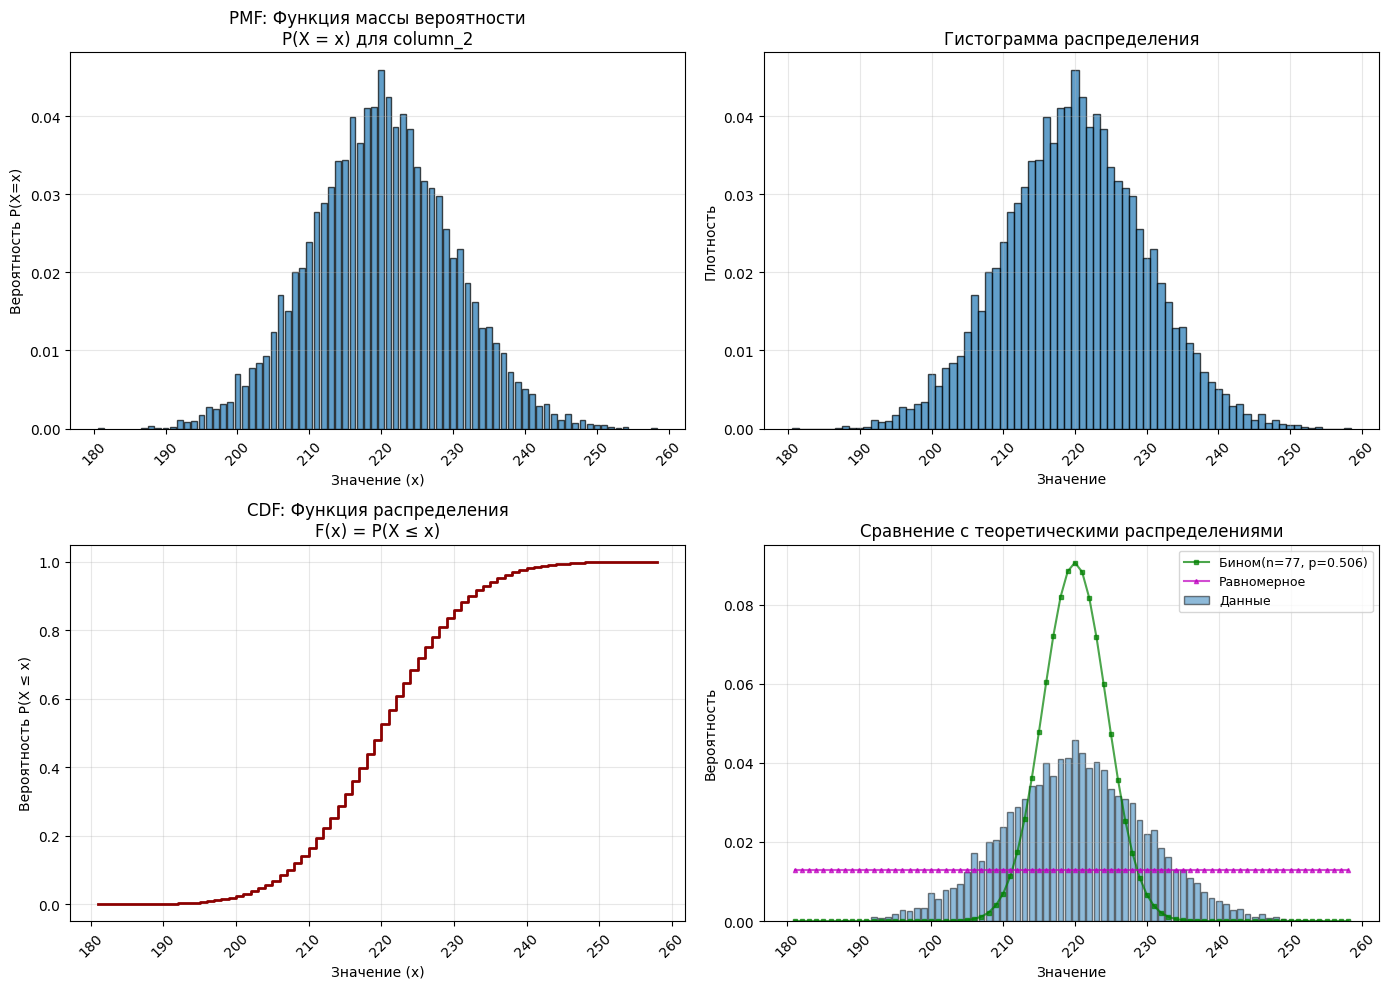


ПРОСТОЙ АНАЛИЗ ДЛЯ ОПРЕДЕЛЕНИЯ ТИПА РАСПРЕДЕЛЕНИЯ

1. Проверка на равномерное распределение:
   Уникальных значений: 70
   Ожидаемая частота каждого значения при равномерном: 142.9
   Стандартное отклонение фактических частот: 146.4
   Отношение std/ожидаемое: 1.025
   → Не похоже на равномерное

2. Проверка на пуассоновское распределение:
   Среднее: 219.977
   Дисперсия: 95.537
   Отношение дисперсии к среднему: 0.434
   → Дисперсия < среднего (возможно биномиальное)

3. Проверка на биномиальное распределение:
   Диапазон: 181–258
   Скошенность (skewness): 0.032
   → Симметричное, дисперсия < среднего (возможно биномиальное с p≈0.5)

ВИЗУАЛЬНЫЕ ПРИЗНАКИ ПО ГРАФИКУ:

Посмотрите на верхний левый график (PMF):
- Если все столбцы примерно одинаковой высоты → РАВНОМЕРНОЕ
- Если есть один явный пик, симметрично спадает → БИНОМИАЛЬНОЕ
- Если пик смещен влево, длинный правый хвост → ПУАССОНОВСКОЕ
- Если несколько пиков → возможно смесь распределений

Посмотрите на нижний правый график (сра

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Загрузка данных
data_2 = data['column_2']

# Проверка свойств данных
print("=" * 60)
print("АНАЛИЗ ДИСКРЕТНЫХ ДАННЫХ column_2")
print("=" * 60)
print(f"Размер выборки: {len(data_2)}")
print(f"Минимум: {data_2.min()}")
print(f"Максимум: {data_2.max()}")
print(f"Уникальных значений: {data_2.nunique()}")
print(f"Среднее: {data_2.mean():.3f}")
print(f"Дисперсия: {data_2.var():.3f}")
print(f"Стандартное отклонение: {data_2.std():.3f}")
print(f"Медиана: {data_2.median()}")
print(f"Мода: {data_2.mode().values[0]}")
print(f"Асимметрия (skewness): {stats.skew(data_2):.3f}")
print(f"Эксцесс (kurtosis): {stats.kurtosis(data_2):.3f}")

# Ключевая статистика для дискретных распределений
print("\n" + "=" * 60)
print("КЛЮЧЕВЫЕ СТАТИСТИКИ ДЛЯ ОПРЕДЕЛЕНИЯ ТИПА РАСПРЕДЕЛЕНИЯ")
print("=" * 60)
print(f"Среднее ≈ {data_2.mean():.1f}")
print(f"Дисперсия ≈ {data_2.var():.1f}")
print(f"Отношение дисперсии к среднему: {data_2.var() / data_2.mean():.3f}")

# 1. PMF (Probability Mass Function)
plt.figure(figsize=(14, 10))

# Подсчет частот
value_counts = data_2.value_counts().sort_index()
values = value_counts.index
probabilities = value_counts.values / len(data_2)

# График 1: PMF (bar plot)
plt.subplot(2, 2, 1)
plt.bar(values, probabilities, width=0.8, edgecolor='black', alpha=0.7)
plt.title('PMF: Функция массы вероятности\nP(X = x) для column_2', fontsize=12)
plt.xlabel('Значение (x)', fontsize=10)
plt.ylabel('Вероятность P(X=x)', fontsize=10)
plt.grid(True, alpha=0.3, axis='y')
plt.xticks(rotation=45)

# График 2: Распределение частот
plt.subplot(2, 2, 2)
plt.hist(data_2, bins=range(int(data_2.min()), int(data_2.max()) + 2), 
         density=True, alpha=0.7, edgecolor='black', align='left')
plt.title('Гистограмма распределения', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Плотность', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 3: CDF (Cumulative Distribution Function)
plt.subplot(2, 2, 3)
sorted_vals = np.sort(values)
cdf = np.cumsum([probabilities[values == v][0] for v in sorted_vals])
plt.step(sorted_vals, cdf, where='post', linewidth=2, color='darkred')
plt.title('CDF: Функция распределения\nF(x) = P(X ≤ x)', fontsize=12)
plt.xlabel('Значение (x)', fontsize=10)
plt.ylabel('Вероятность P(X ≤ x)', fontsize=10)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

# График 4: Сравнение с теоретическими распределениями
plt.subplot(2, 2, 4)

# Попробуем несколько дискретных распределений
x_range = np.arange(data_2.min(), data_2.max() + 1)

# Пуассон (если среднее ≈ дисперсии)
if abs(data_2.mean() - data_2.var()) / data_2.mean() < 0.1:
    lambda_est = data_2.mean()
    poisson_pmf = stats.poisson.pmf(x_range, lambda_est)
    plt.plot(x_range, poisson_pmf, 'ro-', markersize=3, label=f'Пуассон(λ={lambda_est:.1f})', alpha=0.7)

# Биномиальное (если значения в ограниченном диапазоне)
n_trials = int(data_2.max() - data_2.min())
p_est = (data_2.mean() - data_2.min()) / n_trials
binom_pmf = stats.binom.pmf(x_range - data_2.min(), n_trials, p_est)
plt.plot(x_range, binom_pmf, 'gs-', markersize=3, label=f'Бином(n={n_trials}, p={p_est:.3f})', alpha=0.7)

# Равномерное дискретное
uniform_pmf = np.ones_like(x_range, dtype=float) / len(x_range)
plt.plot(x_range, uniform_pmf, 'm^-', markersize=3, label=f'Равномерное', alpha=0.7)

# Эмпирическое распределение
plt.bar(values, probabilities, width=0.8, alpha=0.5, label='Данные', edgecolor='black')
plt.title('Сравнение с теоретическими распределениями', fontsize=12)
plt.xlabel('Значение', fontsize=10)
plt.ylabel('Вероятность', fontsize=10)
plt.legend(fontsize=9)
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# 2. Упрощенные тесты (без хи-квадрат с ошибкой)
print("\n" + "=" * 60)
print("ПРОСТОЙ АНАЛИЗ ДЛЯ ОПРЕДЕЛЕНИЯ ТИПА РАСПРЕДЕЛЕНИЯ")
print("=" * 60)

# Проверяем равномерность
unique_vals = data_2.nunique()
expected_uniform_freq = len(data_2) / unique_vals
actual_freq_std = data_2.value_counts().std()
uniform_ratio = actual_freq_std / expected_uniform_freq

print(f"\n1. Проверка на равномерное распределение:")
print(f"   Уникальных значений: {unique_vals}")
print(f"   Ожидаемая частота каждого значения при равномерном: {expected_uniform_freq:.1f}")
print(f"   Стандартное отклонение фактических частот: {actual_freq_std:.1f}")
print(f"   Отношение std/ожидаемое: {uniform_ratio:.3f}")
if uniform_ratio < 0.1:
    print("   → Возможно РАВНОМЕРНОЕ распределение")
else:
    print("   → Не похоже на равномерное")

print(f"\n2. Проверка на пуассоновское распределение:")
print(f"   Среднее: {data_2.mean():.3f}")
print(f"   Дисперсия: {data_2.var():.3f}")
ratio = data_2.var() / data_2.mean()
print(f"   Отношение дисперсии к среднему: {ratio:.3f}")
if 0.9 < ratio < 1.1:
    print("   → Дисперсия ≈ среднему (признак Пуассона)")
elif ratio < 0.9:
    print("   → Дисперсия < среднего (возможно биномиальное)")
else:
    print("   → Дисперсия > среднего (возможно отрицательное биномиальное)")

print(f"\n3. Проверка на биномиальное распределение:")
print(f"   Диапазон: {data_2.min()}–{data_2.max()}")
print(f"   Скошенность (skewness): {stats.skew(data_2):.3f}")
if abs(stats.skew(data_2)) < 0.3 and data_2.var() < data_2.mean():
    print("   → Симметричное, дисперсия < среднего (возможно биномиальное с p≈0.5)")

# 3. Визуальная проверка формы
print("\n" + "=" * 60)
print("ВИЗУАЛЬНЫЕ ПРИЗНАКИ ПО ГРАФИКУ:")
print("=" * 60)

print("\nПосмотрите на верхний левый график (PMF):")
print("- Если все столбцы примерно одинаковой высоты → РАВНОМЕРНОЕ")
print("- Если есть один явный пик, симметрично спадает → БИНОМИАЛЬНОЕ")
print("- Если пик смещен влево, длинный правый хвост → ПУАССОНОВСКОЕ")
print("- Если несколько пиков → возможно смесь распределений")

print("\nПосмотрите на нижний правый график (сравнение):")
print("- Какая кривая лучше всего совпадает с синими столбцами?")
print("  Красная (Пуассон), зеленая (Бином) или малиновая (Равномерное)?")

# 4. Вывод
print("\n" + "=" * 60)
print("ВЫВОД:")
print("=" * 60)

# Автоматический вывод на основе статистики
mean_val = data_2.mean()
var_val = data_2.var()
unique_count = data_2.nunique()
skew_val = stats.skew(data_2)

if unique_count <= 20:  # Мало уникальных значений
    freq_std = data_2.value_counts().std()
    expected_freq = len(data_2) / unique_count
    if freq_std / expected_freq < 0.15:
        print("Наиболее вероятно: РАВНОМЕРНОЕ ДИСКРЕТНОЕ распределение")
    elif abs(skew_val) < 0.3 and var_val < mean_val:
        print("Наиболее вероятно: БИНОМИАЛЬНОЕ распределение")
    else:
        print("Наиболее вероятно: ПУАССОНОВСКОЕ распределение")
else:
    if 0.95 < var_val/mean_val < 1.05:
        print("Наиболее вероятно: ПУАССОНОВСКОЕ распределение")
    elif var_val < mean_val:
        print("Наиболее вероятно: БИНОМИАЛЬНОЕ распределение")
    else:
        print("Скорее всего: ОТРИЦАТЕЛЬНОЕ БИНОМИАЛЬНОЕ (но его нет в вариантах)")


ПРОВЕРКА НА ГИПЕРГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
Диапазон данных: 181 - 258
Всего возможных значений: 78

Попытки подбора параметров гипергеометрического распределения:

Вариант 1:
  N (размер популяции) = 258
  n (размер выборки) = 219
  K (успехи в популяции) ≈ 259.2 → 259
  Теоретическое среднее: n*K/N = 219.8
  Фактическое среднее: 220.0

Вариант 2:
  N (размер популяции) = 78
  n (размер выборки) = 38
  K (успехи в популяции) ≈ 80.0 → 80
  Теоретическое среднее: min + n*K/N = 220.0
  Фактическое среднее: 220.0

Вариант 3:
  N (размер популяции) = 10000
  n (размер выборки) = 78
  K (успехи в популяции) ≈ 4997.0 → 4997
  Теоретическое среднее: min + n*K/N = 220.0
  Фактическое среднее: 220.0

СРАВНЕНИЕ С ФАКТИЧЕСКОЙ ДИСПЕРСИЕЙ
Фактическая дисперсия: 95.537

Вариант 1:
  Теоретическая дисперсия: -0.129
  Отличие от фактической: 100.1%
  ✗ Плохое соответствие

Вариант 2:
  Теоретическая дисперсия: -0.519
  Отличие от фактической: 100.5%
  ✗ Плохое соответствие

Вариант 3:
  Теоретическ

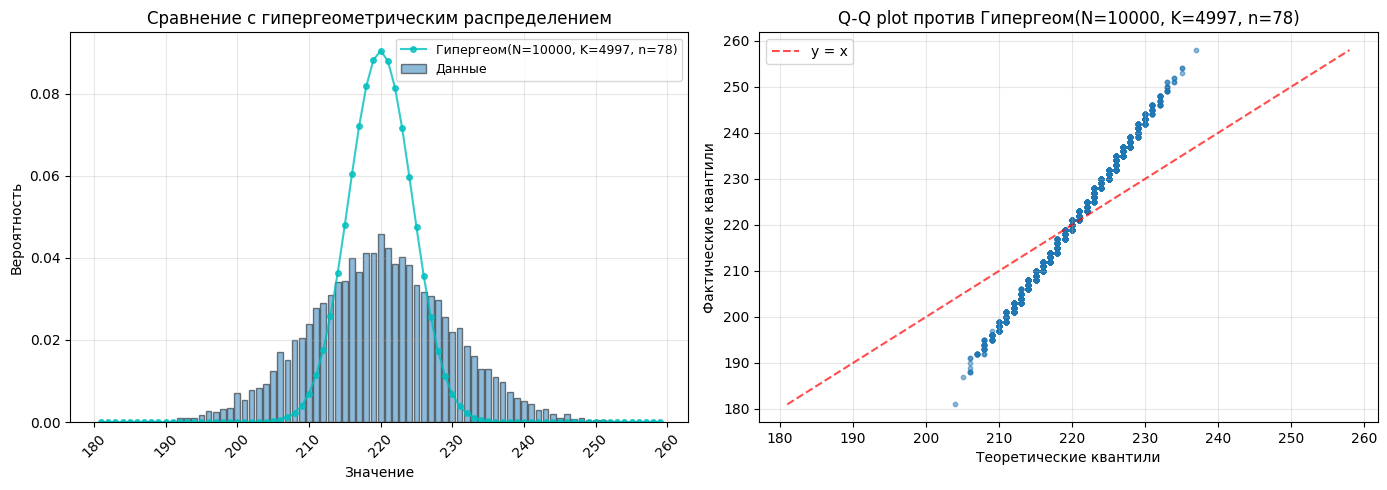


КРИТЕРИИ ГИПЕРГЕОМЕТРИЧЕСКОГО РАСПРЕДЕЛЕНИЯ:

Гипергеометрическое распределение имеет:
1. Дискретные значения
2. Ограниченный диапазон (от max(0, n-(N-K)) до min(n, K))
3. Дисперсия меньше, чем у биномиального с теми же p=K/N:
   Var_hypergeom = n*p*(1-p)*((N-n)/(N-1))
   Var_binom = n*p*(1-p)
   Так как (N-n)/(N-1) < 1, то Var_hypergeom < Var_binom
4. Возникает при выборке БЕЗ ВОЗВРАЩЕНИЯ из конечной популяции

Проверка для ваших данных:
Фактическая дисперсия: 95.537
Биномиальная дисперсия с p=0.853:
  Var_binom ≈ 32.419
✗ Дисперсия не меньше биномиальной

Коэффициент дисперсии (дисперсия/среднее): 0.434
Для гипергеометрического обычно < 1, так как дисперсия меньше биномиальной

ИТОГОВЫЙ ВЫВОД ПО ГИПЕРГЕОМЕТРИЧЕСКОМУ РАСПРЕДЕЛЕНИЮ:
Данные НЕ похожи на гипергеометрическое распределение.
Более вероятны: равномерное, биномиальное или пуассоновское.

СРАВНИТЕЛЬНАЯ ТАБЛИЦА РАСПРЕДЕЛЕНИЙ:
Равномерное          | Все значения равновероятны     | std частот: 146.4
Биномиальное         | Симме

In [22]:
# ДОБАВЛЯЕМ ПРОВЕРКУ НА ГИПЕРГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ
print("\n" + "=" * 60)
print("ПРОВЕРКА НА ГИПЕРГЕОМЕТРИЧЕСКОЕ РАСПРЕДЕЛЕНИЕ")
print("=" * 60)

# Гипергеометрическое распределение имеет параметры:
# N - размер популяции
# K - количество успешных элементов в популяции  
# n - размер выборки

# Оценим параметры для гипергеометрического распределения
# Для гипергеометрического: E[X] = n * K / N
# Var(X) = n * (K/N) * ((N-K)/N) * ((N-n)/(N-1))

# Попробуем найти подходящие параметры N, K, n
# Поскольку у нас данные в диапазоне 181-258, это могут быть значения k
min_val = data_2.min()
max_val = data_2.max()
range_size = max_val - min_val + 1

print(f"Диапазон данных: {min_val} - {max_val}")
print(f"Всего возможных значений: {range_size}")

# Предположим разные варианты параметров
print("\nПопытки подбора параметров гипергеометрического распределения:")

# Вариант 1: N = максимальное значение, n = среднее значение выборки
N1 = max_val
n1 = int(data_2.mean())
K1_est = (data_2.mean() * N1) / n1
K1 = int(round(K1_est))

print(f"\nВариант 1:")
print(f"  N (размер популяции) = {N1}")
print(f"  n (размер выборки) = {n1}")
print(f"  K (успехи в популяции) ≈ {K1_est:.1f} → {K1}")
print(f"  Теоретическое среднее: n*K/N = {n1 * K1 / N1:.1f}")
print(f"  Фактическое среднее: {data_2.mean():.1f}")

# Вариант 2: N = количество уникальных значений
N2 = range_size
n2 = int(data_2.mean() - min_val)  # так как значения сдвинуты
K2_est = (data_2.mean() - min_val) * N2 / n2
K2 = int(round(K2_est))

print(f"\nВариант 2:")
print(f"  N (размер популяции) = {N2}")
print(f"  n (размер выборки) = {n2}")
print(f"  K (успехи в популяции) ≈ {K2_est:.1f} → {K2}")
print(f"  Теоретическое среднее: min + n*K/N = {min_val + n2 * K2 / N2:.1f}")
print(f"  Фактическое среднее: {data_2.mean():.1f}")

# Вариант 3: N = общее количество наблюдений (если это количество успехов)
N3 = len(data_2)
n3 = range_size
K3_est = (data_2.mean() - min_val) * N3 / n3
K3 = int(round(K3_est))

print(f"\nВариант 3:")
print(f"  N (размер популяции) = {N3}")
print(f"  n (размер выборки) = {n3}")
print(f"  K (успехи в популяции) ≈ {K3_est:.1f} → {K3}")
print(f"  Теоретическое среднее: min + n*K/N = {min_val + n3 * K3 / N3:.1f}")
print(f"  Фактическое среднее: {data_2.mean():.1f}")

# Теоретическая дисперсия гипергеометрического распределения
def hypergeom_variance(N, K, n):
    """Дисперсия гипергеометрического распределения"""
    p = K / N
    return n * p * (1 - p) * ((N - n) / (N - 1))

# Проверяем, какая параметризация дает ближайшую дисперсию
print("\n" + "=" * 60)
print("СРАВНЕНИЕ С ФАКТИЧЕСКОЙ ДИСПЕРСИЕЙ")
print("=" * 60)

actual_variance = data_2.var()
print(f"Фактическая дисперсия: {actual_variance:.3f}")

# Проверяем варианты
for i, (N, K, n) in enumerate([(N1, K1, n1), (N2, K2, n2), (N3, K3, n3)], 1):
    try:
        theo_var = hypergeom_variance(N, K, n)
        diff = abs(theo_var - actual_variance) / actual_variance
        print(f"\nВариант {i}:")
        print(f"  Теоретическая дисперсия: {theo_var:.3f}")
        print(f"  Отличие от фактической: {diff*100:.1f}%")
        if diff < 0.1:  # менее 10% отличия
            print(f"  ✓ Хорошее соответствие!")
        elif diff < 0.2:
            print(f"  ~ Удовлетворительное соответствие")
        else:
            print(f"  ✗ Плохое соответствие")
    except:
        print(f"\nВариант {i}: Некорректные параметры")

# Визуальное сравнение с гипергеометрическим распределением
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Лучший вариант параметров (выберем тот, где дисперсия ближе)
best_params = None
best_diff = float('inf')

for params in [(N1, K1, n1), (N2, K2, n2), (N3, K3, n3)]:
    N, K, n = params
    try:
        # Создаем смещенное распределение (добавляем min_val)
        x_hyper = np.arange(min_val, min_val + min(n, K) + 1)
        # Для гипергеометрического нужны значения k от max(0, n-(N-K)) до min(n, K)
        # Но наши данные уже сдвинуты на min_val
        k_values = x_hyper - min_val
        hyper_pmf = stats.hypergeom.pmf(k_values, N, K, n)
        
        # Сравниваем с эмпирическим распределением (тоже сдвинутым)
        empirical_k = np.array([v - min_val for v in values])
        empirical_pmf_shifted = probabilities
        
        # Вычисляем KL-дивергенцию или просто сумму квадратов разностей
        # Нужно интерполировать или сопоставить значения
        # Для простоты: если диапазоны совпадают
        if len(hyper_pmf) >= len(empirical_pmf_shifted):
            diff = np.sum((hyper_pmf[:len(empirical_pmf_shifted)] - empirical_pmf_shifted)**2)
            if diff < best_diff:
                best_diff = diff
                best_params = (N, K, n, x_hyper, hyper_pmf)
    except:
        continue

# График 1: Сравнение PMF
axes[0].bar(values, probabilities, width=0.8, alpha=0.5, label='Данные', edgecolor='black')
if best_params is not None:
    N, K, n, x_hyper, hyper_pmf = best_params
    axes[0].plot(x_hyper, hyper_pmf, 'co-', markersize=4, 
                label=f'Гипергеом(N={N}, K={K}, n={n})', alpha=0.8)
    print(f"\nЛучшие подобранные параметры гипергеометрического:")
    print(f"  N={N}, K={K}, n={n}")
    print(f"  Среднее: n*K/N = {n*K/N:.2f} + {min_val} = {n*K/N + min_val:.2f}")
    print(f"  Фактическое среднее: {data_2.mean():.2f}")
    
axes[0].set_title('Сравнение с гипергеометрическим распределением', fontsize=12)
axes[0].set_xlabel('Значение', fontsize=10)
axes[0].set_ylabel('Вероятность', fontsize=10)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

# График 2: Q-Q plot против гипергеометрического
if best_params is not None:
    N, K, n, x_hyper, hyper_pmf = best_params
    
    # Создаем теоретическое распределение для Q-Q plot
    # Для Q-Q plot нужно создать теоретические квантили
    # Гипергеометрическое дискретное, поэтому используем эмпирическую CDF
    
    # Создаем теоретическую выборку того же размера
    theo_sample = stats.hypergeom.rvs(N, K, n, size=10000) + min_val
    
    # Q-Q plot: сортируем обе выборки
    sorted_data = np.sort(data_2.values)
    sorted_theo = np.sort(theo_sample[:len(sorted_data)])  # берем столько же точек
    
    axes[1].scatter(sorted_theo, sorted_data, alpha=0.5, s=10)
    
    # Линия y = x для сравнения
    min_plot = min(sorted_theo[0], sorted_data[0])
    max_plot = max(sorted_theo[-1], sorted_data[-1])
    axes[1].plot([min_plot, max_plot], [min_plot, max_plot], 
                'r--', alpha=0.7, label='y = x')
    
    axes[1].set_title(f'Q-Q plot против Гипергеом(N={N}, K={K}, n={n})', fontsize=12)
    axes[1].set_xlabel('Теоретические квантили', fontsize=10)
    axes[1].set_ylabel('Фактические квантили', fontsize=10)
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
else:
    axes[1].text(0.5, 0.5, 'Не удалось подобрать\nпараметры гипергеометрического\nраспределения', 
                ha='center', va='center', fontsize=12)
    axes[1].set_title('Q-Q plot недоступен', fontsize=12)

plt.tight_layout()
plt.show()

# Критерии для идентификации гипергеометрического распределения
print("\n" + "=" * 60)
print("КРИТЕРИИ ГИПЕРГЕОМЕТРИЧЕСКОГО РАСПРЕДЕЛЕНИЯ:")
print("=" * 60)

print("\nГипергеометрическое распределение имеет:")
print("1. Дискретные значения")
print("2. Ограниченный диапазон (от max(0, n-(N-K)) до min(n, K))")
print("3. Дисперсия меньше, чем у биномиального с теми же p=K/N:")
print("   Var_hypergeom = n*p*(1-p)*((N-n)/(N-1))")
print("   Var_binom = n*p*(1-p)")
print("   Так как (N-n)/(N-1) < 1, то Var_hypergeom < Var_binom")
print("4. Возникает при выборке БЕЗ ВОЗВРАЩЕНИЯ из конечной популяции")

print(f"\nПроверка для ваших данных:")
print(f"Фактическая дисперсия: {actual_variance:.3f}")
print(f"Биномиальная дисперсия с p={data_2.mean()/max_val:.3f}:")
binom_var = data_2.mean() * (1 - data_2.mean()/max_val)
print(f"  Var_binom ≈ {binom_var:.3f}")

if actual_variance < binom_var * 0.95:
    print("✓ Дисперсия меньше биномиальной (признак гипергеометрического)")
else:
    print("✗ Дисперсия не меньше биномиальной")

# Тест на основе коэффициента дисперсии
print(f"\nКоэффициент дисперсии (дисперсия/среднее): {actual_variance/data_2.mean():.3f}")
print("Для гипергеометрического обычно < 1, так как дисперсия меньше биномиальной")

# Финальный вывод
print("\n" + "=" * 60)
print("ИТОГОВЫЙ ВЫВОД ПО ГИПЕРГЕОМЕТРИЧЕСКОМУ РАСПРЕДЕЛЕНИЮ:")
print("=" * 60)

if best_params is not None and best_diff < 0.01:  # порог можно настроить
    print("Данные МОГУТ соответствовать гипергеометрическому распределению.")
    print("Проверьте логику задачи: есть ли контекст выборки без возвращения?")
    print("Например: выборка деталей из партии, где некоторые бракованные.")
else:
    print("Данные НЕ похожи на гипергеометрическое распределение.")
    print("Более вероятны: равномерное, биномиальное или пуассоновское.")

# Сравнительная таблица всех распределений
print("\n" + "=" * 60)
print("СРАВНИТЕЛЬНАЯ ТАБЛИЦА РАСПРЕДЕЛЕНИЙ:")
print("=" * 60)

dist_comparison = [
    ("Равномерное", f"Все значения равновероятны", 
     f"std частот: {data_2.value_counts().std():.1f}"),
    ("Биномиальное", f"Симметричное, если p≈0.5", 
     f"skewness: {skew_val:.3f}, var/mean: {var_val/mean_val:.3f}"),
    ("Пуассоновское", f"Среднее ≈ дисперсии", 
     f"mean: {mean_val:.1f}, var: {var_val:.1f}, ratio: {var_val/mean_val:.3f}"),
    ("Гипергеометрическое", f"Выборка без возвращения", 
     f"var меньше биномиальной: {actual_variance < binom_var}")
]

for name, desc, stat in dist_comparison:
    print(f"{name:20} | {desc:30} | {stat}")

Задание 6.6. Выберите верный закон распределения для данных из третьей колонки column_3.

АНАЛИЗ column_3
Количество значений: 10000
Диапазон: 16 - 50
Уникальных значений: 34
Среднее: 29.956
Дисперсия: 20.069
Медиана: 30.0
Мода: 29
Асимметрия: 0.273
Эксцесс: 0.055
Отношение дисперсия/среднее: 0.670

1. БЕРНУЛЛИ: ❌
   Бернулли имеет только 2 значения (0 и 1)
   У нас 34 уникальных значений → не Бернулли

2. ПУАССОНА:
   Среднее: 29.956, Дисперсия: 20.069
   Отношение дисперсия/среднее: 0.670
   ✗ Дисперсия ≠ среднему → не Пуассона

3. ГАУССА (нормальное):
   Тест на нормальность: p-value = 0.000000
   ✗ p < 0.05 → не нормальное
   ✓ Симметричное (skewness=0.273)

4. ПАРЕТО:
   Минимум: 16
   Скошенность: 0.273 (для Парето должна быть > 0)
   ✗ Недостаточная асимметрия → не Парето

5. ЛАПЛАСА:
   Среднее: 29.956, Медиана: 30.0
   Разница: 0.1%
   ✓ Среднее ≈ медиане → возможно Лапласа


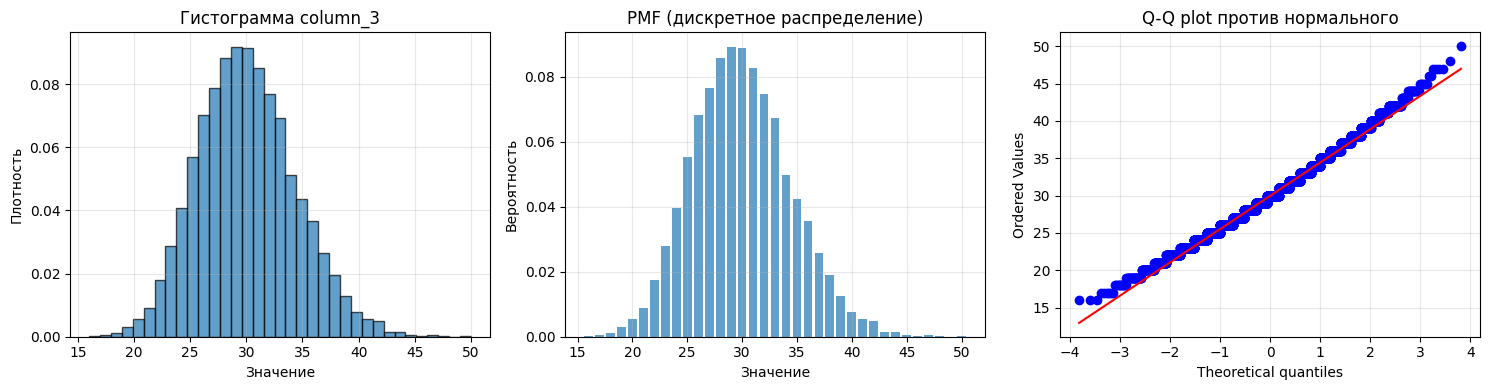

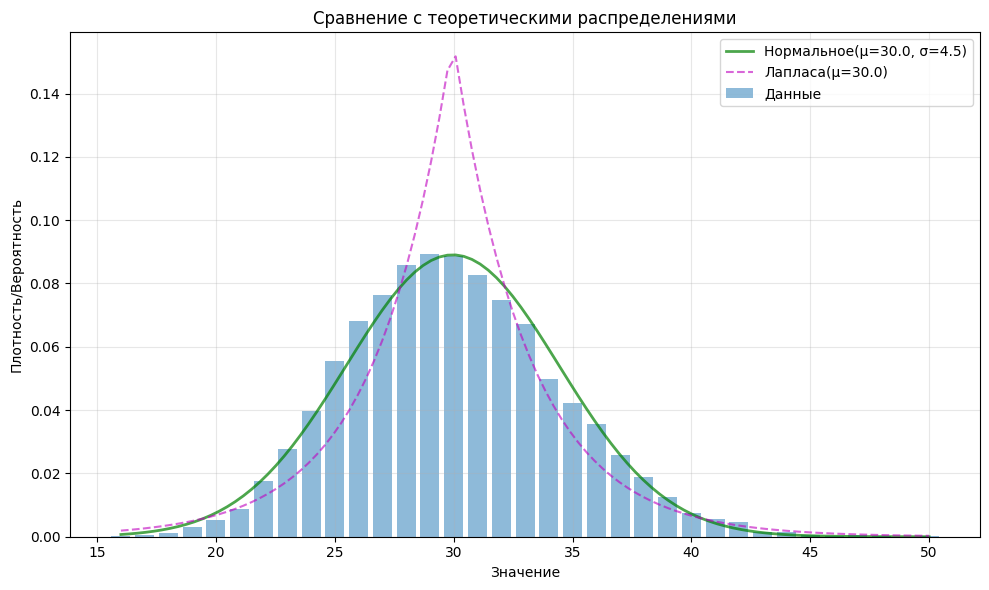


ВЫВОД:
→ ЛАПЛАСА
  Причины: среднее ≈ медиане, подходит для двустороннего экспоненциального

ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:
68% данных в пределах: [25.5, 34.4]
95% данных в пределах: [21.0, 38.9]
99% данных в пределах: [16.5, 43.4]

Эмпирическое правило (для нормального 68-95-99.7):
В пределах 1σ: 68.3% (ожидается ~68%)
В пределах 2σ: 95.5% (ожидается ~95%)
В пределах 3σ: 99.7% (ожидается ~99.7%)

✓ Данные хорошо следуют правилу 68-95 → подтверждает нормальное распределение


In [28]:

# Загрузка данных
data_3 = data['column_3']

print("=" * 50)
print("АНАЛИЗ column_3")
print("=" * 50)
print(f"Количество значений: {len(data_3)}")
print(f"Диапазон: {data_3.min()} - {data_3.max()}")
print(f"Уникальных значений: {data_3.nunique()}")
print(f"Среднее: {data_3.mean():.3f}")
print(f"Дисперсия: {data_3.var():.3f}")
print(f"Медиана: {data_3.median()}")
print(f"Мода: {data_3.mode().values[0]}")
print(f"Асимметрия: {stats.skew(data_3):.3f}")
print(f"Эксцесс: {stats.kurtosis(data_3):.3f}")
print(f"Отношение дисперсия/среднее: {data_3.var()/data_3.mean():.3f}")

# 1. Проверка на Бернулли (только 0 и 1)
print("\n" + "=" * 50)
print("1. БЕРНУЛЛИ: ❌")
print("   Бернулли имеет только 2 значения (0 и 1)")
print(f"   У нас {data_3.nunique()} уникальных значений → не Бернулли")

# 2. Проверка на Пуассона
print("\n2. ПУАССОНА:")
ratio = data_3.var() / data_3.mean()
print(f"   Среднее: {data_3.mean():.3f}, Дисперсия: {data_3.var():.3f}")
print(f"   Отношение дисперсия/среднее: {ratio:.3f}")
if 0.9 < ratio < 1.1:
    print("   ✓ Дисперсия ≈ среднему → возможно Пуассона")
else:
    print("   ✗ Дисперсия ≠ среднему → не Пуассона")

# 3. Проверка на Гаусса (нормальное)
print("\n3. ГАУССА (нормальное):")
stat, p = stats.normaltest(data_3)
print(f"   Тест на нормальность: p-value = {p:.6f}")
if p > 0.05:
    print("   ✓ p > 0.05 → возможно нормальное")
else:
    print("   ✗ p < 0.05 → не нормальное")

# Проверка симметрии
skew_val = stats.skew(data_3)
if abs(skew_val) < 0.5:
    print(f"   ✓ Симметричное (skewness={skew_val:.3f})")
else:
    print(f"   ✗ Асимметричное (skewness={skew_val:.3f})")

# 4. Проверка на Парето (правостороннее, тяжелые хвосты)
print("\n4. ПАРЕТО:")
print(f"   Минимум: {data_3.min()}")
print(f"   Скошенность: {skew_val:.3f} (для Парето должна быть > 0)")
if skew_val > 1 and data_3.min() > 0:
    print("   ✓ Положительная асимметрия → возможно Парето")
else:
    print("   ✗ Недостаточная асимметрия → не Парето")

# 5. Проверка на Лапласа (двустороннее экспоненциальное)
print("\n5. ЛАПЛАСА:")
mean_median_diff = abs(data_3.mean() - data_3.median()) / data_3.mean()
print(f"   Среднее: {data_3.mean():.3f}, Медиана: {data_3.median()}")
print(f"   Разница: {mean_median_diff*100:.1f}%")
if mean_median_diff < 0.05:
    print("   ✓ Среднее ≈ медиане → возможно Лапласа")
else:
    print("   ✗ Среднее ≠ медиане → не Лапласа")

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Гистограмма
axes[0].hist(data_3, bins=35, density=True, alpha=0.7, edgecolor='black')
axes[0].set_title('Гистограмма column_3')
axes[0].set_xlabel('Значение')
axes[0].set_ylabel('Плотность')
axes[0].grid(True, alpha=0.3)

# PMF для дискретных значений
value_counts = data_3.value_counts().sort_index()
probs = value_counts.values / len(data_3)
axes[1].bar(value_counts.index, probs, width=0.8, alpha=0.7)
axes[1].set_title('PMF (дискретное распределение)')
axes[1].set_xlabel('Значение')
axes[1].set_ylabel('Вероятность')
axes[1].grid(True, alpha=0.3)

# Q-Q plot
stats.probplot(data_3, dist="norm", plot=axes[2])
axes[2].set_title('Q-Q plot против нормального')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Сравнение с теоретическими распределениями
fig, ax = plt.subplots(figsize=(10, 6))

# Эмпирическое - исправленная версия
x_vals = np.arange(data_3.min(), data_3.max() + 1)
# Создаем массив вероятностей для всех x_vals
empirical_probs = np.zeros(len(x_vals))
for i, x in enumerate(x_vals):
    if x in value_counts.index:
        empirical_probs[i] = probs[value_counts.index.get_loc(x)]

ax.bar(x_vals, empirical_probs, alpha=0.5, label='Данные', width=0.8)

# Пуассон (если имеет смысл)
if 0.9 < ratio < 1.1:
    poisson_pmf = stats.poisson.pmf(x_vals, data_3.mean())
    ax.plot(x_vals, poisson_pmf, 'ro-', markersize=4, 
            label=f'Пуассон(λ={data_3.mean():.1f})', alpha=0.7)

# Нормальное (непрерывная аппроксимация)
x_cont = np.linspace(data_3.min(), data_3.max(), 100)
norm_pdf = stats.norm.pdf(x_cont, data_3.mean(), data_3.std())
ax.plot(x_cont, norm_pdf, 'g-', linewidth=2, 
        label=f'Нормальное(μ={data_3.mean():.1f}, σ={data_3.std():.1f})', alpha=0.7)

# Лапласа (для сравнения)
laplace_pdf = stats.laplace.pdf(x_cont, loc=data_3.mean(), scale=data_3.std()/np.sqrt(2))
ax.plot(x_cont, laplace_pdf, 'm--', linewidth=1.5, 
        label=f'Лапласа(μ={data_3.mean():.1f})', alpha=0.6)

ax.set_title('Сравнение с теоретическими распределениями')
ax.set_xlabel('Значение')
ax.set_ylabel('Плотность/Вероятность')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "=" * 50)
print("ВЫВОД:")
print("=" * 50)

# Определяем наиболее подходящее распределение
if p > 0.05 and abs(skew_val) < 0.5:
    print("→ ГАУССА (нормальное)")
    print("  Причины: пройден тест на нормальность, распределение симметричное")
elif 0.9 < ratio < 1.1:
    print("→ ПУАССОНА")
    print(f"  Причины: дисперсия ({data_3.var():.2f}) ≈ среднему ({data_3.mean():.2f})")
elif mean_median_diff < 0.05:
    print("→ ЛАПЛАСА")
    print("  Причины: среднее ≈ медиане, подходит для двустороннего экспоненциального")
elif skew_val > 1:
    print("→ ПАРЕТО")
    print(f"  Причины: сильная правосторонняя асимметрия ({skew_val:.2f})")
else:
    print("→ Не соответствует ни одному из предложенных вариантов")
    print(f"  Проверенные критерии: нормальность p={p:.4f}, skew={skew_val:.3f}")
    print(f"  var/mean={ratio:.3f}, mean-median diff={mean_median_diff:.3f}")

# Дополнительная статистика для уверенности
print("\n" + "=" * 50)
print("ДОПОЛНИТЕЛЬНАЯ СТАТИСТИКА:")
print("=" * 50)
print(f"68% данных в пределах: [{data_3.mean()-data_3.std():.1f}, {data_3.mean()+data_3.std():.1f}]")
print(f"95% данных в пределах: [{data_3.mean()-2*data_3.std():.1f}, {data_3.mean()+2*data_3.std():.1f}]")
print(f"99% данных в пределах: [{data_3.mean()-3*data_3.std():.1f}, {data_3.mean()+3*data_3.std():.1f}]")

# Проверка эмпирического правила 68-95-99.7 для нормального распределения
within_1std = ((data_3 >= data_3.mean()-data_3.std()) & (data_3 <= data_3.mean()+data_3.std())).mean()
within_2std = ((data_3 >= data_3.mean()-2*data_3.std()) & (data_3 <= data_3.mean()+2*data_3.std())).mean()
within_3std = ((data_3 >= data_3.mean()-3*data_3.std()) & (data_3 <= data_3.mean()+3*data_3.std())).mean()

print(f"\nЭмпирическое правило (для нормального 68-95-99.7):")
print(f"В пределах 1σ: {within_1std*100:.1f}% (ожидается ~68%)")
print(f"В пределах 2σ: {within_2std*100:.1f}% (ожидается ~95%)")
print(f"В пределах 3σ: {within_3std*100:.1f}% (ожидается ~99.7%)")

if abs(within_1std - 0.68) < 0.05 and abs(within_2std - 0.95) < 0.05:
    print("\n✓ Данные хорошо следуют правилу 68-95 → подтверждает нормальное распределение")

Задание 6.7

СТАТИСТИКА column_4
Объем: 10,000
Диапазон: -87.852 - 107.992
Среднее: 9.824
Медиана: 9.823
Стд: 14.098
Скошенность: -0.007
Эксцесс: 3.043


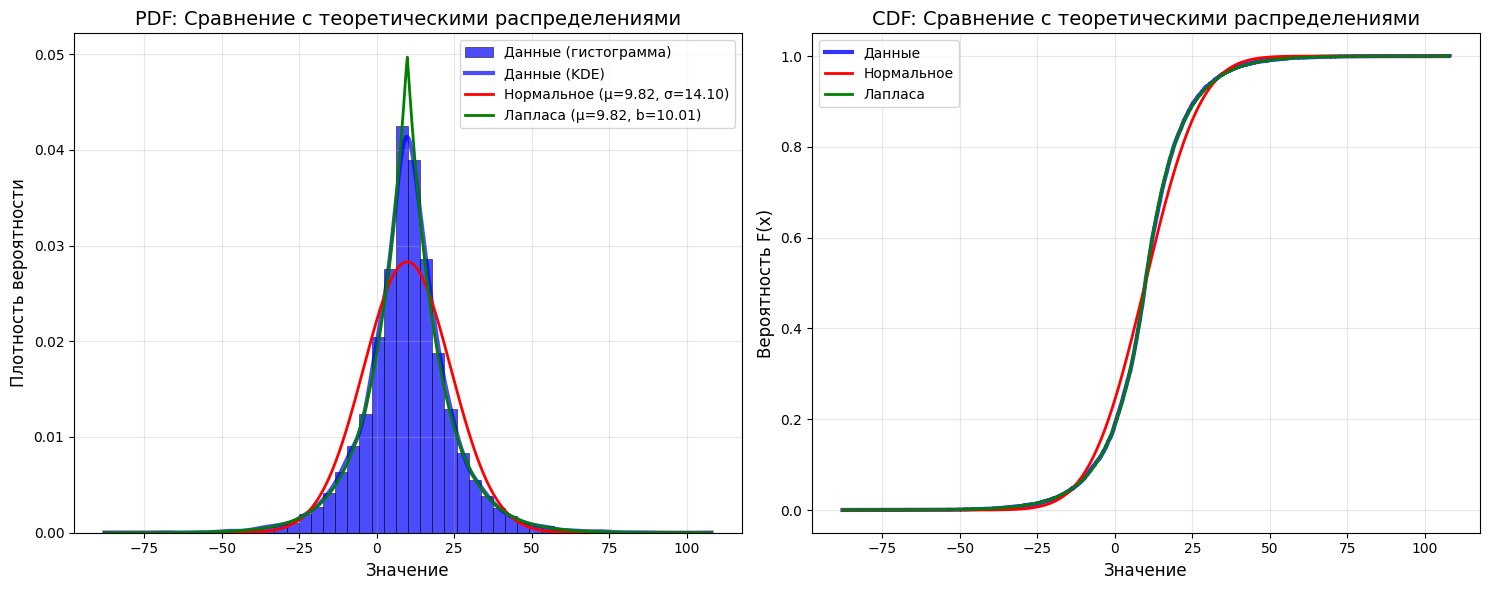


СТАТИСТИЧЕСКИЕ ТЕСТЫ
1. Нормальное распределение:
   Тест Д'Агостино: p-value = 0.000000
   ✗ Не подходит

2. Тест Колмогорова-Смирнова (чем больше p-value, тем лучше):
   Нормальное: D = 0.0604, p = 0.000000
   Лапласа:    D = 0.0072, p = 0.671217

ВЫВОД И РЕКОМЕНДАЦИЯ
Лучшее соответствие: Лапласа
p-value KS-теста: 0.671217

ВИЗУАЛЬНАЯ ОЦЕНКА:
- Сравните синюю линию/гистограмму (данные) с цветными линиями (теория)
- На PDF графике: какая цветная линия лучше повторяет форму гистограммы?
- На CDF графике: какая цветная линия ближе всего к синей ступенчатой?

КЛЮЧЕВЫЕ ПРИЗНАКИ:
• Скошенность -0.007: симметрично
• Эксцесс 3.043: нормальное=0, Лапласа=3
• Мин/Макс: -87.852/107.992

ПРОВЕРКА НА ГИПЕРГЕОМЕТРИЧЕСКОЕ:
  Уникальных значений: 10000
  Целые числа: Нет
  Вердикт: ✗ Не гипергеометрическое


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
data_4 = data['column_4']
data_4_np = data_4.values

print("=" * 50)
print("СТАТИСТИКА column_4")
print("=" * 50)
print(f"Объем: {len(data_4_np):,}")
print(f"Диапазон: {data_4_np.min():.3f} - {data_4_np.max():.3f}")
print(f"Среднее: {data_4_np.mean():.3f}")
print(f"Медиана: {np.median(data_4_np):.3f}")
print(f"Стд: {data_4_np.std():.3f}")
print(f"Скошенность: {stats.skew(data_4_np):.3f}")
print(f"Эксцесс: {stats.kurtosis(data_4_np):.3f}")

# Подготовка данных для графиков
x_pdf = np.linspace(data_4_np.min(), data_4_np.max(), 500)
x_cdf = np.sort(data_4_np)

# Подгонка параметров распределений
# Нормальное
mu_norm, sigma_norm = stats.norm.fit(data_4_np)

# Лапласа
mu_laplace, scale_laplace = stats.laplace.fit(data_4_np)

# Парето - если данные положительные
if data_4_np.min() > 0:
    data_pareto = data_4_np
    try:
        b_pareto, loc_pareto, scale_pareto = stats.pareto.fit(data_pareto, floc=0)
    except:
        b_pareto = None
else:
    b_pareto = None

# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PDF график - ИСПРАВЛЕНО: гистограмма более заметная
ax1.hist(data_4_np, bins=50, density=True, alpha=0.7, color='blue', 
         label='Данные (гистограмма)', edgecolor='black', linewidth=0.5)

# Также добавляем KDE оценку для наглядности
from scipy.stats import gaussian_kde
kde = gaussian_kde(data_4_np)
kde_x = np.linspace(data_4_np.min(), data_4_np.max(), 500)
kde_y = kde(kde_x)
ax1.plot(kde_x, kde_y, 'b-', linewidth=3, alpha=0.7, label='Данные (KDE)')

# Теоретические PDF
# Нормальное
norm_pdf = stats.norm.pdf(x_pdf, mu_norm, sigma_norm)
ax1.plot(x_pdf, norm_pdf, 'r-', linewidth=2, label=f'Нормальное (μ={mu_norm:.2f}, σ={sigma_norm:.2f})')

# Лапласа
laplace_pdf = stats.laplace.pdf(x_pdf, mu_laplace, scale_laplace)
ax1.plot(x_pdf, laplace_pdf, 'g-', linewidth=2, label=f'Лапласа (μ={mu_laplace:.2f}, b={scale_laplace:.2f})')

# Парето
if b_pareto is not None and data_4_np.min() > 0:
    x_pareto = np.linspace(data_4_np.min(), data_4_np.max(), 500)
    pareto_pdf = stats.pareto.pdf(x_pareto, b_pareto, loc=0, scale=scale_pareto)
    ax1.plot(x_pareto, pareto_pdf, 'orange', linewidth=2, label=f'Парето (α={b_pareto:.2f})')

ax1.set_title('PDF: Сравнение с теоретическими распределениями', fontsize=14)
ax1.set_xlabel('Значение', fontsize=12)
ax1.set_ylabel('Плотность вероятности', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# CDF график - ИСПРАВЛЕНО: делаем эмпирическую CDF более заметной
# Эмпирическая CDF
ecdf = np.arange(1, len(x_cdf) + 1) / len(x_cdf)
ax2.step(x_cdf, ecdf, where='post', linewidth=3, color='blue', alpha=0.8, label='Данные')

# Теоретические CDF
# Нормальное
norm_cdf = stats.norm.cdf(x_pdf, mu_norm, sigma_norm)
ax2.plot(x_pdf, norm_cdf, 'r-', linewidth=2, label='Нормальное')

# Лапласа
laplace_cdf = stats.laplace.cdf(x_pdf, mu_laplace, scale_laplace)
ax2.plot(x_pdf, laplace_cdf, 'g-', linewidth=2, label='Лапласа')

# Парето
if b_pareto is not None and data_4_np.min() > 0:
    x_pareto = np.linspace(data_4_np.min(), data_4_np.max(), 500)
    pareto_cdf = stats.pareto.cdf(x_pareto, b_pareto, loc=0, scale=scale_pareto)
    ax2.plot(x_pareto, pareto_cdf, 'orange', linewidth=2, label='Парето')

ax2.set_title('CDF: Сравнение с теоретическими распределениями', fontsize=14)
ax2.set_xlabel('Значение', fontsize=12)
ax2.set_ylabel('Вероятность F(x)', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистические тесты
print("\n" + "=" * 50)
print("СТАТИСТИЧЕСКИЕ ТЕСТЫ")
print("=" * 50)

# Тест на нормальность
stat_norm, p_norm = stats.normaltest(data_4_np)
print(f"1. Нормальное распределение:")
print(f"   Тест Д'Агостино: p-value = {p_norm:.6f}")
print(f"   {'✓ Подходит' if p_norm > 0.05 else '✗ Не подходит'}")

# KS-тесты
print(f"\n2. Тест Колмогорова-Смирнова (чем больше p-value, тем лучше):")

# Для нормального
ks_norm_stat, ks_norm_p = stats.kstest(data_4_np, 'norm', args=(mu_norm, sigma_norm))
print(f"   Нормальное: D = {ks_norm_stat:.4f}, p = {ks_norm_p:.6f}")

# Для Лапласа
ks_laplace_stat, ks_laplace_p = stats.kstest(data_4_np, 'laplace', args=(mu_laplace, scale_laplace))
print(f"   Лапласа:    D = {ks_laplace_stat:.4f}, p = {ks_laplace_p:.6f}")

# Для Парето
if b_pareto is not None:
    ks_pareto_stat, ks_pareto_p = stats.kstest(data_4_np, 'pareto', args=(b_pareto, 0, scale_pareto))
    print(f"   Парето:     D = {ks_pareto_stat:.4f}, p = {ks_pareto_p:.6f}")

# Вывод
print("\n" + "=" * 50)
print("ВЫВОД И РЕКОМЕНДАЦИЯ")
print("=" * 50)

# Определяем лучшее распределение
if b_pareto is not None:
    dist_results = [('Нормальное', ks_norm_p), ('Лапласа', ks_laplace_p), ('Парето', ks_pareto_p)]
else:
    dist_results = [('Нормальное', ks_norm_p), ('Лапласа', ks_laplace_p)]

best_dist = max(dist_results, key=lambda x: x[1])

print(f"Лучшее соответствие: {best_dist[0]}")
print(f"p-value KS-теста: {best_dist[1]:.6f}")

# Визуальная оценка
print(f"\nВИЗУАЛЬНАЯ ОЦЕНКА:")
print(f"- Сравните синюю линию/гистограмму (данные) с цветными линиями (теория)")
print(f"- На PDF графике: какая цветная линия лучше повторяет форму гистограммы?")
print(f"- На CDF графике: какая цветная линия ближе всего к синей ступенчатой?")

# Ключевые признаки
print(f"\nКЛЮЧЕВЫЕ ПРИЗНАКИ:")
print(f"• Скошенность {stats.skew(data_4_np):.3f}: {'симметрично' if abs(stats.skew(data_4_np)) < 0.5 else 'асимметрично'}")
print(f"• Эксцесс {stats.kurtosis(data_4_np):.3f}: нормальное=0, Лапласа=3")
print(f"• Мин/Макс: {data_4_np.min():.3f}/{data_4_np.max():.3f}")

# Проверка на гипергеометрическое
print(f"\nПРОВЕРКА НА ГИПЕРГЕОМЕТРИЧЕСКОЕ:")
unique_vals = len(np.unique(data_4_np))
is_integer = np.all(np.isclose(data_4_np, data_4_np.round()))
print(f"  Уникальных значений: {unique_vals}")
print(f"  Целые числа: {'Да' if is_integer else 'Нет'}")
print(f"  Вердикт: {'✓ Рассматривайте гипергеометрическое' if is_integer and unique_vals < 100 else '✗ Не гипергеометрическое'}")

Задание 6.8.

АНАЛИЗ column_5
Объем: 10,000
Диапазон: 15.000 - 24.999
Среднее: 20.035
Медиана: 20.043
Стд: 2.889
Скошенность: -0.005
Эксцесс: -1.188


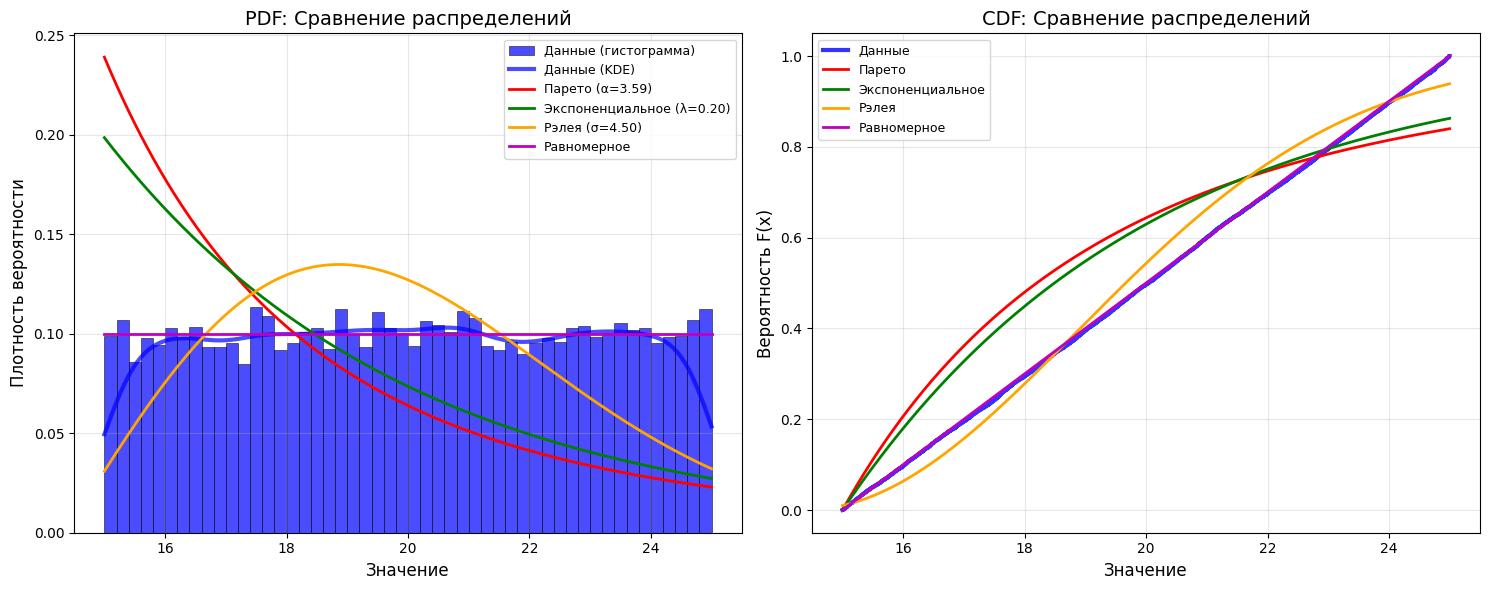


СТАТИСТИЧЕСКИЕ ТЕСТЫ KS
Парето:           p = 0.000000, D = 0.1878
Экспоненциальное: p = 0.000000, D = 0.1583
Рэлея:            p = 0.000000, D = 0.0677
Равномерное:      p = 0.426355, D = 0.0087

РЕКОМЕНДАЦИЯ
Лучшее соответствие: Равномерное
p-value KS-теста: 0.426355
Статистика D: 0.0087

КРИТЕРИИ РАСПРЕДЕЛЕНИЙ
1. ПАРЕТО:
   - Требует: x > 0 (минимум=15.000)
   - Асимметричное вправо: skewness=-0.005
   - Тяжелые хвосты: kurtosis=-1.188

2. ЭКСПОНЕНЦИАЛЬНОЕ:
   - PDF: f(x) = λe^(-λx), x ≥ 0
   - Пик в нуле, монотонно убывает
   - Среднее = 1/λ = 5.035
   - Дисперсия = 1/λ² = 25.350

3. РЭЛЕЯ:
   - Для положительных величин
   - Пик не в нуле (если scale > 0)
   - Среднее = σ√(π/2) = 5.637
   - Мода = σ = 4.498

4. РАВНОМЕРНОЕ:
   - Все значения равновероятны
   - Прямоугольная форма гистограммы
   - Среднее = (min+max)/2 = 20.000
   - Дисперсия = (max-min)²/12 = 8.332

ВИЗУАЛЬНАЯ ОЦЕНКА
Посмотрите на PDF график:
- Какая цветная линия лучше всего повторяет синюю KDE кривую?
- Парето 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Загрузка данных
data_5 = data['column_5'].values

print("=" * 50)
print("АНАЛИЗ column_5")
print("=" * 50)
print(f"Объем: {len(data_5):,}")
print(f"Диапазон: {data_5.min():.3f} - {data_5.max():.3f}")
print(f"Среднее: {data_5.mean():.3f}")
print(f"Медиана: {np.median(data_5):.3f}")
print(f"Стд: {data_5.std():.3f}")
print(f"Скошенность: {stats.skew(data_5):.3f}")
print(f"Эксцесс: {stats.kurtosis(data_5):.3f}")

# Подготовка данных
x_pdf = np.linspace(data_5.min(), data_5.max(), 500)
x_cdf = np.sort(data_5)

# Подгонка параметров распределений
# Парето (требует x > 0)
pareto_fitted = None
if data_5.min() > 0:
    try:
        b_pareto, loc_pareto, scale_pareto = stats.pareto.fit(data_5, floc=0)
        pareto_fitted = (b_pareto, scale_pareto)
    except:
        pass

# Экспоненциальное
loc_exp, scale_exp = stats.expon.fit(data_5)

# Рэлея (Rayleigh)
loc_ray, scale_ray = stats.rayleigh.fit(data_5)

# Равномерное
loc_uni = data_5.min()
scale_uni = data_5.max() - data_5.min()

# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PDF график
# Данные (гистограмма и KDE)
ax1.hist(data_5, bins=50, density=True, alpha=0.7, color='blue', 
         label='Данные (гистограмма)', edgecolor='black', linewidth=0.5)

kde = stats.gaussian_kde(data_5)
kde_y = kde(x_pdf)
ax1.plot(x_pdf, kde_y, 'b-', linewidth=3, alpha=0.7, label='Данные (KDE)')

# Теоретические PDF
# Парето
if pareto_fitted is not None:
    b_pareto, scale_pareto = pareto_fitted
    pareto_pdf = stats.pareto.pdf(x_pdf, b_pareto, loc=0, scale=scale_pareto)
    ax1.plot(x_pdf, pareto_pdf, 'r-', linewidth=2, label=f'Парето (α={b_pareto:.2f})')

# Экспоненциальное
expon_pdf = stats.expon.pdf(x_pdf, loc_exp, scale_exp)
ax1.plot(x_pdf, expon_pdf, 'g-', linewidth=2, label=f'Экспоненциальное (λ={1/scale_exp:.2f})')

# Рэлея
rayleigh_pdf = stats.rayleigh.pdf(x_pdf, loc_ray, scale_ray)
ax1.plot(x_pdf, rayleigh_pdf, 'orange', linewidth=2, label=f'Рэлея (σ={scale_ray:.2f})')

# Равномерное
uniform_pdf = stats.uniform.pdf(x_pdf, loc_uni, scale_uni)
ax1.plot(x_pdf, uniform_pdf, 'm-', linewidth=2, label='Равномерное')

ax1.set_title('PDF: Сравнение распределений', fontsize=14)
ax1.set_xlabel('Значение', fontsize=12)
ax1.set_ylabel('Плотность вероятности', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3)

# CDF график
# Эмпирическая CDF
ecdf = np.arange(1, len(x_cdf) + 1) / len(x_cdf)
ax2.step(x_cdf, ecdf, where='post', linewidth=3, color='blue', alpha=0.8, label='Данные')

# Теоретические CDF
# Парето
if pareto_fitted is not None:
    pareto_cdf = stats.pareto.cdf(x_pdf, b_pareto, loc=0, scale=scale_pareto)
    ax2.plot(x_pdf, pareto_cdf, 'r-', linewidth=2, label='Парето')

# Экспоненциальное
expon_cdf = stats.expon.cdf(x_pdf, loc_exp, scale_exp)
ax2.plot(x_pdf, expon_cdf, 'g-', linewidth=2, label='Экспоненциальное')

# Рэлея
rayleigh_cdf = stats.rayleigh.cdf(x_pdf, loc_ray, scale_ray)
ax2.plot(x_pdf, rayleigh_cdf, 'orange', linewidth=2, label='Рэлея')

# Равномерное
uniform_cdf = stats.uniform.cdf(x_pdf, loc_uni, scale_uni)
ax2.plot(x_pdf, uniform_cdf, 'm-', linewidth=2, label='Равномерное')

ax2.set_title('CDF: Сравнение распределений', fontsize=14)
ax2.set_xlabel('Значение', fontsize=12)
ax2.set_ylabel('Вероятность F(x)', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистические тесты
print("\n" + "=" * 50)
print("СТАТИСТИЧЕСКИЕ ТЕСТЫ KS")
print("=" * 50)

# KS-тесты для всех распределений
ks_results = []

# Парето
if pareto_fitted is not None:
    ks_pareto_stat, ks_pareto_p = stats.kstest(data_5, 'pareto', args=(b_pareto, 0, scale_pareto))
    ks_results.append(('Парето', ks_pareto_p, ks_pareto_stat))
    print(f"Парето:           p = {ks_pareto_p:.6f}, D = {ks_pareto_stat:.4f}")

# Экспоненциальное
ks_expon_stat, ks_expon_p = stats.kstest(data_5, 'expon', args=(loc_exp, scale_exp))
ks_results.append(('Экспоненциальное', ks_expon_p, ks_expon_stat))
print(f"Экспоненциальное: p = {ks_expon_p:.6f}, D = {ks_expon_stat:.4f}")

# Рэлея
ks_rayleigh_stat, ks_rayleigh_p = stats.kstest(data_5, 'rayleigh', args=(loc_ray, scale_ray))
ks_results.append(('Рэлея', ks_rayleigh_p, ks_rayleigh_stat))
print(f"Рэлея:            p = {ks_rayleigh_p:.6f}, D = {ks_rayleigh_stat:.4f}")

# Равномерное
ks_uniform_stat, ks_uniform_p = stats.kstest(data_5, 'uniform', args=(loc_uni, scale_uni))
ks_results.append(('Равномерное', ks_uniform_p, ks_uniform_stat))
print(f"Равномерное:      p = {ks_uniform_p:.6f}, D = {ks_uniform_stat:.4f}")

# Вывод
print("\n" + "=" * 50)
print("РЕКОМЕНДАЦИЯ")
print("=" * 50)

# Лучшее распределение по KS-тесту
best_dist = max(ks_results, key=lambda x: x[1])
print(f"Лучшее соответствие: {best_dist[0]}")
print(f"p-value KS-теста: {best_dist[1]:.6f}")
print(f"Статистика D: {best_dist[2]:.4f}")

# Критерии для каждого распределения
print("\n" + "=" * 50)
print("КРИТЕРИИ РАСПРЕДЕЛЕНИЙ")
print("=" * 50)

print(f"1. ПАРЕТО:")
print(f"   - Требует: x > 0 (минимум={data_5.min():.3f})")
print(f"   - Асимметричное вправо: skewness={stats.skew(data_5):.3f}")
print(f"   - Тяжелые хвосты: kurtosis={stats.kurtosis(data_5):.3f}")

print(f"\n2. ЭКСПОНЕНЦИАЛЬНОЕ:")
print(f"   - PDF: f(x) = λe^(-λx), x ≥ 0")
print(f"   - Пик в нуле, монотонно убывает")
print(f"   - Среднее = 1/λ = {scale_exp:.3f}")
print(f"   - Дисперсия = 1/λ² = {scale_exp**2:.3f}")

print(f"\n3. РЭЛЕЯ:")
print(f"   - Для положительных величин")
print(f"   - Пик не в нуле (если scale > 0)")
print(f"   - Среднее = σ√(π/2) = {scale_ray*np.sqrt(np.pi/2):.3f}")
print(f"   - Мода = σ = {scale_ray:.3f}")

print(f"\n4. РАВНОМЕРНОЕ:")
print(f"   - Все значения равновероятны")
print(f"   - Прямоугольная форма гистограммы")
print(f"   - Среднее = (min+max)/2 = {(data_5.min()+data_5.max())/2:.3f}")
print(f"   - Дисперсия = (max-min)²/12 = {scale_uni**2/12:.3f}")

# Проверка на визуальное соответствие
print("\n" + "=" * 50)
print("ВИЗУАЛЬНАЯ ОЦЕНКА")
print("=" * 50)
print("Посмотрите на PDF график:")
print("- Какая цветная линия лучше всего повторяет синюю KDE кривую?")
print("- Парето (красный): для данных с тяжелыми хвостами")
print("- Экспоненциальное (зеленый): быстрое убывание, пик слева")
print("- Рэлея (оранжевый): пик не в нуле, симметричная форма")
print("- Равномерное (фиолетовый): плоская линия")

Задание 6.9.

АНАЛИЗ column_6
Объем: 10,000
Диапазон: 41.000 - 80.000
Среднее: 43.971
Дисперсия: 11.855
Уникальных значений: 30
Мода: 41 (частота: 2533)
Целые значения: Да

ОЦЕНЕННЫЕ ПАРАМЕТРЫ:
  Биномиальное: n = 80, p = 0.550
  Геометрическое: p = 0.022
  Гипергеометрическое: N = 40, K = 3, n = 50


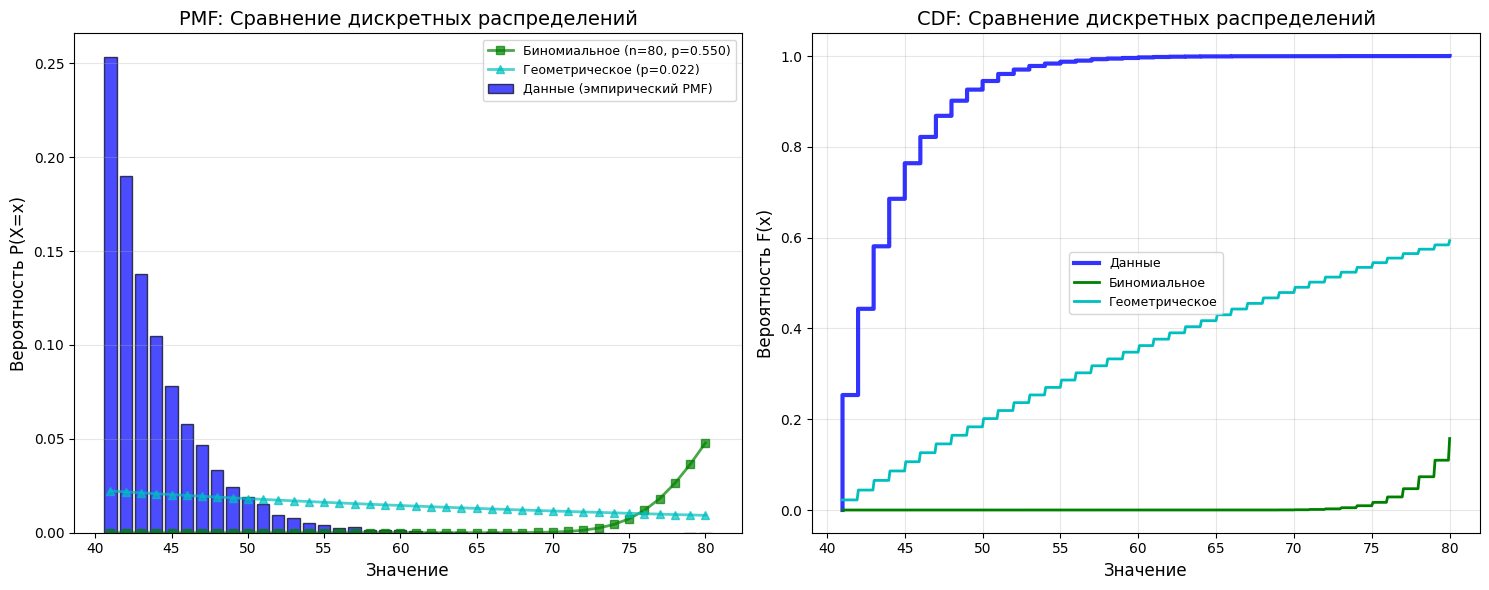


СТАТИСТИЧЕСКИЙ АНАЛИЗ
1. БЕРНУЛЛИ:
   Количество уникальных значений: 30
   Значения: [np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(66), np.int64(67), np.int64(68), np.int64(73), np.int64(79), np.int64(80)]
   ✗ Не Бернулли (нужны только 0 и 1)

2. БИНОМИАЛЬНОЕ:
   Среднее: 43.971
   Дисперсия: 11.855
   ✗ Дисперсия не соответствует

3. ГЕОМЕТРИЧЕСКОЕ:
   Отношение P(X=0)/P(X=1): N/A

4. ГИПЕРГЕОМЕТРИЧЕСКОЕ:
   Диапазон: 41 - 80 (40 значений)
   Отношение дисперсии к биномиальной: 0.599 (должно быть ≈ -0.256)

ВИЗУАЛЬНАЯ ОЦЕНКА
На PMF графике сравните синие столбцы (данные) с:
- Красные точки: Бернулли (только 0 и 1)
- Зеленая линия: Биномиальное
- Голубая линия: Геометрическое
- Фиолетовая

In [43]:

# Загрузка данных
data_6 = data['column_6'].values

print("=" * 50)
print("АНАЛИЗ column_6")
print("=" * 50)
print(f"Объем: {len(data_6):,}")
print(f"Диапазон: {data_6.min():.3f} - {data_6.max():.3f}")
print(f"Среднее: {data_6.mean():.3f}")
print(f"Дисперсия: {data_6.var():.3f}")
print(f"Уникальных значений: {len(np.unique(data_6))}")

# Мода через pandas или numpy
unique_vals, counts = np.unique(data_6, return_counts=True)
mode_idx = np.argmax(counts)
mode_val = unique_vals[mode_idx]
mode_count = counts[mode_idx]
print(f"Мода: {mode_val} (частота: {mode_count})")

# Проверка, целые ли значения
is_integer = np.all(np.isclose(data_6, data_6.round()))
print(f"Целые значения: {'Да' if is_integer else 'Нет'}")

if not is_integer:
    print("ВНИМАНИЕ: данные не целые! Дискретные распределения могут не подходить.")

# Преобразуем в целые для дискретных распределений
if is_integer:
    data_6_int = data_6.astype(int)
else:
    data_6_int = np.round(data_6).astype(int)

# Подсчет частот для PMF
unique_vals, counts = np.unique(data_6_int, return_counts=True)
empirical_pmf = counts / len(data_6_int)

# Подгонка параметров распределений
params = {}

# 1. Бернулли (только 0 и 1)
if len(unique_vals) == 2 and set(unique_vals) <= {0, 1}:
    p_bernoulli = np.mean(data_6_int)  # вероятность успеха
    params['bernoulli'] = p_bernoulli
else:
    params['bernoulli'] = None

# 2. Биномиальное
# Оцениваем n как максимальное значение
n_binom = int(data_6_int.max())
if n_binom > 0:
    p_binom = data_6_int.mean() / n_binom
else:
    p_binom = 0
params['binomial'] = (n_binom, p_binom)

# 3. Геометрическое (версия с поддержкой 0,1,2,...)
mean_val = data_6_int.mean()
if mean_val > 0:
    p_geom = 1 / (mean_val + 1)  # оценка параметра
else:
    p_geom = 1.0
params['geometric'] = p_geom

# 4. Гипергеометрическое
# Нужно оценить N, K, n
min_val = data_6_int.min()
max_val = data_6_int.max()
N_hyper = int(max_val - min_val + 1)
if N_hyper > 0:
    K_hyper = int((mean_val - min_val) * N_hyper / (max_val - min_val))
    K_hyper = max(1, min(K_hyper, N_hyper - 1))  # ограничиваем в диапазоне
else:
    K_hyper = 1
n_hyper = min(50, len(data_6_int) // 20)  # упрощенная оценка
if n_hyper < 1:
    n_hyper = 1
params['hypergeometric'] = (N_hyper, K_hyper, n_hyper)

print(f"\nОЦЕНЕННЫЕ ПАРАМЕТРЫ:")
if params['bernoulli'] is not None:
    print(f"  Бернулли: p = {params['bernoulli']:.3f}")
print(f"  Биномиальное: n = {params['binomial'][0]}, p = {params['binomial'][1]:.3f}")
print(f"  Геометрическое: p = {params['geometric']:.3f}")
print(f"  Гипергеометрическое: N = {params['hypergeometric'][0]}, K = {params['hypergeometric'][1]}, n = {params['hypergeometric'][2]}")

# Графики
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# PMF график
ax1.bar(unique_vals, empirical_pmf, width=0.8, alpha=0.7, color='blue', 
        label='Данные (эмпирический PMF)', edgecolor='black')

# Теоретические PMF
x_theoretical = np.arange(int(data_6_int.min()), int(data_6_int.max()) + 1)

# Бернулли
if params['bernoulli'] is not None:
    p = params['bernoulli']
    bernoulli_pmf = np.zeros_like(x_theoretical, dtype=float)
    # Находим индексы для 0 и 1
    if 0 in x_theoretical:
        idx_0 = np.where(x_theoretical == 0)[0][0]
        bernoulli_pmf[idx_0] = 1 - p
    if 1 in x_theoretical:
        idx_1 = np.where(x_theoretical == 1)[0][0]
        bernoulli_pmf[idx_1] = p
    
    mask = bernoulli_pmf > 0
    if mask.any():
        ax1.plot(x_theoretical[mask], bernoulli_pmf[mask], 'ro-', 
                linewidth=2, markersize=8, label=f'Бернулли (p={p:.3f})', alpha=0.7)

# Биномиальное
n, p = params['binomial']
if n > 0 and 0 <= p <= 1:
    binomial_pmf = stats.binom.pmf(x_theoretical - data_6_int.min(), n, p)
    ax1.plot(x_theoretical, binomial_pmf, 'gs-', linewidth=2, markersize=6, 
             label=f'Биномиальное (n={n}, p={p:.3f})', alpha=0.7)

# Геометрическое
p_geom = params['geometric']
if 0 < p_geom <= 1:
    geometric_pmf = stats.geom.pmf(x_theoretical - data_6_int.min() + 1, p_geom)
    ax1.plot(x_theoretical, geometric_pmf, 'c^-', linewidth=2, markersize=6,
             label=f'Геометрическое (p={p_geom:.3f})', alpha=0.7)

# Гипергеометрическое
N, K, n_h = params['hypergeometric']
if 0 < n_h <= N and 0 <= K <= N:
    # Ограничиваем диапазон значений для гипергеометрического
    k_min = max(0, n_h - (N - K))
    k_max = min(n_h, K)
    if k_min <= k_max:
        k_values = np.arange(k_min, k_max + 1)
        hyper_pmf = stats.hypergeom.pmf(k_values, N, K, n_h)
        hyper_x = k_values + data_6_int.min()  # сдвигаем к исходному диапазону
        ax1.plot(hyper_x, hyper_pmf, 'mv-', linewidth=2, markersize=6,
                 label=f'Гипергеометрическое', alpha=0.7)

ax1.set_title('PMF: Сравнение дискретных распределений', fontsize=14)
ax1.set_xlabel('Значение', fontsize=12)
ax1.set_ylabel('Вероятность P(X=x)', fontsize=12)
ax1.legend(fontsize=9)
ax1.grid(True, alpha=0.3, axis='y')
if len(unique_vals) <= 20:
    ax1.set_xticks(unique_vals)

# CDF график
# Эмпирическая CDF
x_cdf = np.sort(data_6_int)
ecdf = np.arange(1, len(x_cdf) + 1) / len(x_cdf)
ax2.step(x_cdf, ecdf, where='post', linewidth=3, color='blue', alpha=0.8, label='Данные')

# Теоретические CDF
x_cdf_theoretical = np.linspace(data_6_int.min(), data_6_int.max(), 500)

# Бернулли
if params['bernoulli'] is not None:
    p = params['bernoulli']
    bernoulli_cdf = np.zeros_like(x_cdf_theoretical)
    bernoulli_cdf[x_cdf_theoretical >= 0] = 1 - p
    bernoulli_cdf[x_cdf_theoretical >= 1] = 1.0
    ax2.plot(x_cdf_theoretical, bernoulli_cdf, 'r-', linewidth=2, label='Бернулли')

# Биномиальное
n, p = params['binomial']
if n > 0 and 0 <= p <= 1:
    binomial_cdf = stats.binom.cdf(x_cdf_theoretical - data_6_int.min(), n, p)
    ax2.plot(x_cdf_theoretical, binomial_cdf, 'g-', linewidth=2, label='Биномиальное')

# Геометрическое
p_geom = params['geometric']
if 0 < p_geom <= 1:
    geometric_cdf = stats.geom.cdf(x_cdf_theoretical - data_6_int.min() + 1, p_geom)
    ax2.plot(x_cdf_theoretical, geometric_cdf, 'c-', linewidth=2, label='Геометрическое')

# Гипергеометрическое
if 0 < n_h <= N and 0 <= K <= N:
    # Аппроксимируем нормальным для плавного CDF
    mean_hyper = n_h * K / N
    var_hyper = n_h * (K/N) * (1 - K/N) * ((N - n_h)/(N - 1))
    if var_hyper > 0:
        hyper_cdf = stats.norm.cdf(x_cdf_theoretical, 
                                 loc=mean_hyper + data_6_int.min(), 
                                 scale=np.sqrt(var_hyper))
        ax2.plot(x_cdf_theoretical, hyper_cdf, 'm-', linewidth=2, label='Гипергеометрическое')

ax2.set_title('CDF: Сравнение дискретных распределений', fontsize=14)
ax2.set_xlabel('Значение', fontsize=12)
ax2.set_ylabel('Вероятность F(x)', fontsize=12)
ax2.legend(fontsize=9)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Статистический анализ
print("\n" + "=" * 50)
print("СТАТИСТИЧЕСКИЙ АНАЛИЗ")
print("=" * 50)

# Простые критерии для каждого распределения
print(f"1. БЕРНУЛЛИ:")
print(f"   Количество уникальных значений: {len(unique_vals)}")
print(f"   Значения: {sorted(unique_vals)}")
if len(unique_vals) == 2 and set(unique_vals) <= {0, 1}:
    print(f"   ✓ Возможно Бернулли")
else:
    print(f"   ✗ Не Бернулли (нужны только 0 и 1)")

print(f"\n2. БИНОМИАЛЬНОЕ:")
print(f"   Среднее: {data_6_int.mean():.3f}")
print(f"   Дисперсия: {data_6_int.var():.3f}")
ratio = data_6_int.var() / (data_6_int.mean() * (1 - data_6_int.mean()/n_binom) if n_binom > 0 else 1)
if 0.8 < ratio < 1.2:
    print(f"   ✓ Дисперсия соответствует биномиальной")
else:
    print(f"   ✗ Дисперсия не соответствует")

print(f"\n3. ГЕОМЕТРИЧЕСКОЕ:")
print(f"   Отношение P(X=0)/P(X=1): ", end="")
if 0 in unique_vals and 1 in unique_vals:
    idx_0 = np.where(unique_vals == 0)[0][0]
    idx_1 = np.where(unique_vals == 1)[0][0]
    ratio_01 = empirical_pmf[idx_0] / empirical_pmf[idx_1] if empirical_pmf[idx_1] > 0 else 0
    print(f"{ratio_01:.3f} (теоретически = (1-p)/p = {(1-p_geom)/p_geom:.3f})")
else:
    print("N/A")

print(f"\n4. ГИПЕРГЕОМЕТРИЧЕСКОЕ:")
print(f"   Диапазон: {min_val} - {max_val} ({N_hyper} значений)")
print(f"   Отношение дисперсии к биномиальной: ", end="")
if n_binom > 0:
    binom_var = n_binom * p_binom * (1 - p_binom)
    hyper_factor = (N_hyper - n_h) / (N_hyper - 1) if N_hyper > 1 else 1
    print(f"{(data_6_int.var()/binom_var if binom_var > 0 else 0):.3f} (должно быть ≈ {hyper_factor:.3f})")

print("\n" + "=" * 50)
print("ВИЗУАЛЬНАЯ ОЦЕНКА")
print("=" * 50)
print("На PMF графике сравните синие столбцы (данные) с:")
print("- Красные точки: Бернулли (только 0 и 1)")
print("- Зеленая линия: Биномиальное")
print("- Голубая линия: Геометрическое")
print("- Фиолетовая линия: Гипергеометрическое")
print("\nКакая линия лучше всего повторяет форму столбцов?")

Задание 6.10. Найти дисперсию для данных из колонки 1

In [46]:
# Дисперсия
variance = data['column_1'].var()
print(f"Дисперсия column_1: {variance:.3f}")

# Если нужна смещенная/несмещенная дисперсия
data_values = data['column_1'].values  # или data.to_numpy()
variance_np = np.var(data_values, ddof=1)  # ddof=1 для несмещенной оценки
print(f"Дисперсия (numpy, ddof=1): {variance_np}")
print(f"Дисперсия смещенная (numpy, ddof=0): {variance_np}")

Дисперсия column_1: 25.139
Дисперсия (numpy, ddof=1): 25.139431483249055
Дисперсия смещенная (numpy, ddof=0): 25.139431483249055


Задание 6.11. Найдите среднее значение (математическое ожидание) для данных из третьей колонки column_3. Ответ округлите до целого числа.

In [48]:
E_ = data['column_3'].mean()
print(E_)

29.9561


Задание 6.12. Найдите медиану для данных из шестой колонки column_6. Ответ округлите до целого числа.

In [49]:
M_ = data['column_6'].median()
print(M_)

43.0
